# TP3: Regression linéaire

On considère le modèle de regression simple
$$ Y_i = X_i \theta + \varepsilon_i \ ,$$
où $i=1, 2, \dots, n$. Les variables de bruit $\varepsilon_i$ sont iid normales centrées de variance $\sigma^2$.

On réécrit le tout matriciellement sous la forme
$$ \mathbb{Y} = \mathbb{X} \Theta + \varepsilon \ ,$$
avec
- $\mathbb{Y} \in \mathbb{R}^n \approx M_{n,1}(\mathbb{R})$
- $\Theta \in \mathbb{R}^k \approx M_{k,1}(\mathbb{R})$
- $\mathbb{X} \in M_{n,k}(\mathbb{R})$
- $\varepsilon \in \mathbb{R}^n$


## I. Déclaration de modules et de datasets

In [1]:
import numpy as np

In [2]:
# Echantillon A: Hours travaillées vs Score du SAT
# Xa = Nombre d'heures travaillées
# Ya = Scores
Xa = np.array( [   4,   9,  10,  14,   4,   7,  12,  22,   1,   3,   8,  11,   5,   6,  10,  11,  16,  13,  13,  10] )
Ya = np.array( [ 390, 580, 650, 730, 410, 530, 600, 790, 350, 400, 590, 640, 450, 520, 690, 690, 770, 700, 730, 640] )

# Echantillon B: Activité du criquet (battements d'aile par seconde) vs température 
# Xb = Température en degrés celcius
# Yb = Battements
Xb2 = np.array( [   88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7, 71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5, 76.3] ) #En Fahrenheit
Xb  = np.array( (Xb2-32.0)*5.0/9.0 )
Yb  = np.array( [   20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7, 15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0, 14.4] )

# Echantillon C: Revenus, Chomage et criminalité de villes américaines
# Xc1 = Population totale de la ville (en milliers)
# Xc2 = Pourcentage des foyers avec un revenu < 5000$ par an
# Xc3 = Pourcentage chomage
# Yc = Meutres par année par 100000 habitants
Xc1 = np.array( [587000, 643000, 635000, 692000, 1248000, 643000, 1964000, 1531000, 713000, 749000, 7895000, 762000, 2793000, 741000, 625000, 854000, 716000, 921000, 595000, 3353000.] )/1e3
Xc2 = np.array( [  16.5,   20.5,   26.3,  16.5 ,    19.2,  16.5 ,    20.2,    21.3,   17.2,  14.3 ,   18.1 ,  23.1 ,   19.1 ,  24.7 ,  18.6 ,   24.9,  17.9 ,  22.4 ,   20.2, 16.9] )
Xc3 = np.array( [   6.2,    6.4,    9.3,    5.3,     7.3,    5.9,     6.4,     7.6,    4.9,    6.4,      6 ,    7.4,     5.8,    8.6,  6.5  ,    8.3,   6.7 ,   8.6 ,    8.4, 6.7 ] )
Yc  = np.array( [ 11.2, 13.4, 40.7,  5.3, 24.8, 12.7, 20.9, 35.7, 8.7, 9.6, 14.5, 26.9, 15.7, 36.2, 18.1, 28.9, 14.9, 25.8, 21.7, 25.7] )

## II. Nuages de points

Exercice 1:
- Donner les plots (en 2D) des échantillons A & B.
- Commenter la corrélation percue.
- Pensez-vous que le modèle linéaire soit une bonne approximation? Sinon, dans quels régimes en particulier?

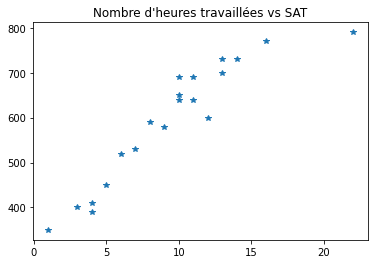

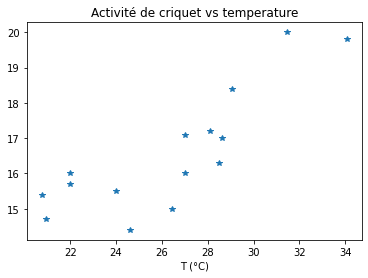

In [3]:
import matplotlib.pyplot as plt

plt.plot(Xa, Ya, '*')
plt.title("Nombre d'heures travaillées vs SAT")
plt.show()

plt.plot(Xb, Yb, '*')
plt.title("Activité de criquet vs temperature")
plt.xlabel("T (°C)")
plt.show()


## III. Implémentation de la régression
Exercice 2:
Pour les trois datasets
- Calculer l'estimateur MCO de $\Theta$ en utilisant directement la formule vue en cours.
- Commenter la valeur de $\Theta_1$
- Tracer un histogramme des résidus
- Calculer le coefficient de détermination $R^2$ et commenter la qualité de la régression

Pour les datasets A & B, on tracera la droite des valeurs ajustées.

--------------------------------
Echantillon A
OLS :  [353.1648795   25.32646778]
R2  :  0.8716192582293903


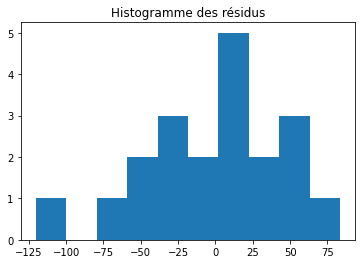

--------------------------------
Echantillon B
OLS :  [6.95530605 0.36539952]
R2  :  0.6922946529147


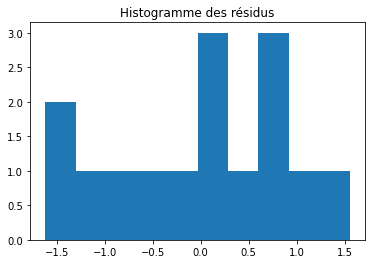

--------------------------------
Echantillon C
OLS :  [-3.67649253e+01  7.62936937e-04  1.19217421e+00  4.71982137e+00]
R2  :  0.8183178658153201


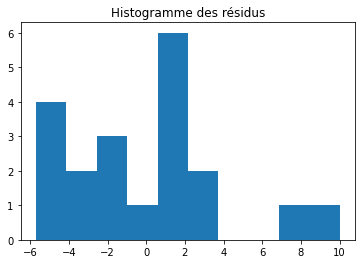

In [4]:
def OLS_estimator(X,Y):
    res = np.dot( X.transpose(), X)
    res = np.linalg.inv( res )
    res = np.dot( res, X.transpose() )
    res = np.dot( res, Y)
    return  res

def R2_coeff(Y_hat, Y):
    n1 = np.linalg.norm(Y_hat-np.mean(Y_hat))
    n2 = np.linalg.norm(Y-np.mean(Y))
    return (n1/n2)**2
    

def analysis(X,Y):
    theta = OLS_estimator(X,Y)
    Y_hat = np.dot(X, theta)
    R2 = R2_coeff(Y_hat, Y)
    print("OLS : ", theta)
    print("R2  : ", R2)
    
    epsilon_hat = Y-Y_hat ## erreur 
    plt.hist(epsilon_hat, bins=10) ## bins $$ epaisseur
    plt.title("Histogramme des résidus")
    plt.show()
    return


intercept = np.ones(Ya.shape) ## constante
X = np.stack( [intercept, Xa], axis=1 ) ## concatenation 
Y = Ya
print("--------------------------------")
print("Echantillon A")
analysis(X,Y)

intercept = np.ones(Yb.shape)
X = np.stack( [intercept, Xb], axis=1 )
Y = Yb
print("--------------------------------")
print("Echantillon B")
analysis(X,Y)

intercept = np.ones(Yc.shape)
X = np.stack( [intercept, Xc1, Xc2, Xc3], axis=1 )
Y = Yc
print("--------------------------------")
print("Echantillon C")
analysis(X,Y)

## IV. Réduction du modèle

Dans le cas de l'échantillon C, on se demande quels sont les facteurs pertinents pour la variable $Y$ et lequels nous pouvons ignorer.

Exercice 3:
Pour l'échantillon C uniquement
- Préciser selon votre intuition, le classement des facteurs, du plus pertinent au moins pertinent.
- Faites une regression de Y contre chacun des facteurs, et calculer les R2 partiels. Interpréter.
- Test d'hypothèse: Considérons l'hypothèse "$H_0: \Theta_j = 0"$. Construire une statistique suivant une loi de Student avec paramètre $n-k$ en divisant $\widehat{\Theta}_j$ par une variance empirique convenable.
Ensuite calculer la p-value associée en utilisant: 
https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html
- Conclure vis-à-vis de la pertinence des facteurs. Est-ce que les grandes villes sont plus dangereuses? Est-ce que le chomage est plus pertinent que la richesse?

Rappelons que la p-value est la probabilité d'observer un évennement aussi extrême que ce que l'on a. Ainsi on pourra utiliser les lignes suivantes:
~~~~
p = stats.t.cdf(T_statistic,df=degrees_of_freedom)
q = 1-p
print("p-value:", min(p,q))
~~~~

In [5]:
# R2 partiels
intercept = np.ones(Yc.shape)
factors = [Xc1, Xc2, Xc3]
print("Partial R2")
for index in range( len(factors) ):
    x = factors[index]
    X = np.stack( [intercept, x], axis=1 )
    Y = Yc
    partial_theta = OLS_estimator(X,Y)
    Y_hat = np.dot(X, partial_theta)
    R2 = R2_coeff(Y_hat, Y)
    print("Factor %d:"%(index+1), R2)


Partial R2
Factor 1: 0.004502194864407717
Factor 2: 0.7052275058037464
Factor 3: 0.7479507451480648


In [6]:
# Test de student
from scipy import stats

Y = Yc
n = Y.shape
X = np.stack( [intercept, Xc1, Xc2, Xc3], axis=1 )
n,k = X.shape

theta = OLS_estimator(X,Y)
Y_hat = np.dot(X, theta)
epsilon_hat = Y-Y_hat
# Unbiased estimator of the noise's variance
s2    = np.linalg.norm(epsilon_hat)**2/(n-k)
# Cov of estimator
cov   = X.transpose().dot(X)
cov   = s2*np.linalg.inv(cov) ## matrice de covariance 

for j in range(k):
    print("Index:", j)
    print("Theta:", theta[j])
    T = theta[j]/np.sqrt(cov[j,j]) 
    print("T-statistique:", T)
    p = stats.t.cdf(T,df=n-k)
    q = 1-p
    print("p-value:", min(p,q))
    print("")


Index: 0
Theta: -36.76492528200639
T-statistique: -5.243947301636997
4.014464672218847e-05
p-value: 4.014464672218847e-05

Index: 1
Theta: 0.0007629369368511464
T-statistique: 1.199018573672411
0.8760112047116586
p-value: 0.12398879528834139

Index: 2
Theta: 1.1921742108294353
T-statistique: 2.1226135716246084
0.9751294135860091
p-value: 0.02487058641399087

Index: 3
Theta: 4.719821371873432
T-statistique: 3.083892210894351
0.9964420502898791
p-value: 0.003557949710120911



- Il faut ignorer le facteur 0 correspondant à l'intercept. Sa valeur ainsi que le test de student associé n'a pas vraiment de sens physique. En tout cas, il est clairement statistiquement non-nul
- Le facteur 1 (taille des villes) n'est pas statistiquement pertinent: On ne peut pas rejeter l'hypothèse $"\theta_1 = 0"$.
- Les facteur 2 et 3, (pauvreté et chomage) sont statistiquement pertinents: Les hypothèses $"\theta_2 = 0"$ et $"\theta_3 = 0"$ sont rejetées pour un seuil de 5%.
Remarquez qu'il est naturel de les penser très corrélés.
